In [21]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sn
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('data_audio_f_mean.csv')

In [23]:
df_test = df.iloc[:, 5:19]

In [24]:
df_test["target"].replace({"abnormal": "1", "normal": "0"}, inplace=True)

In [25]:
df_test = df_test.astype({"target": int})

In [26]:
y = df_test['target']

In [27]:
df_test = df_test.drop('target', 1)

In [28]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='auto')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(df_test, y)

# Split dataframe into random train and test subsets

X_train, X_test, Y_train, Y_test = train_test_split(
    X_over,
    y_over,
    test_size=0.2,
    random_state=200
)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(70651, 13) (70651,)
(17663, 13) (17663,)


In [21]:
# Split dataframe into random train and test subsets

X_train, X_test, Y_train, Y_test = train_test_split(
    df_test,
    y,
    test_size=0.3,
    random_state=200
)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(37839, 13) (37839,)
(16218, 13) (16218,)


In [29]:
from sklearn.neighbors import KNeighborsClassifier

# Import metrics model to check the accuracy
from sklearn import metrics

# Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)

scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(Y_test, y_pred)
    scores_list.append(metrics.accuracy_score(Y_test, y_pred))

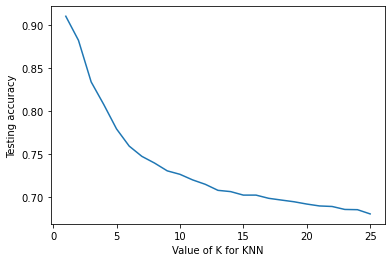

In [30]:
# Evaluate your model

%matplotlib inline
import matplotlib.pyplot as plt

# Plot the relationship between K and the testing accuracy
plt.plot(k_range, scores_list);
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing accuracy');

In [31]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68      8861
           1       0.68      0.68      0.68      8802

    accuracy                           0.68     17663
   macro avg       0.68      0.68      0.68     17663
weighted avg       0.68      0.68      0.68     17663

